<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula02b_MAE%2C_MSE%2C_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [ ]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X = df['MedInc'].values.reshape(-1, 1)
y = df['MedHouseVal'].values
print(X.shape, y.shape)

(20640, 1) (20640,)


In [ ]:
import numpy as np

def train_test_slit(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_slit(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[:5].T)
print(X_test[:5].T)

(16512, 1) (4128, 1) (16512,) (4128,)
[[3.2596 3.8125 4.1563 1.9425 3.5542]]
[[1.6812 2.5313 3.4801 5.7376 3.725 ]]


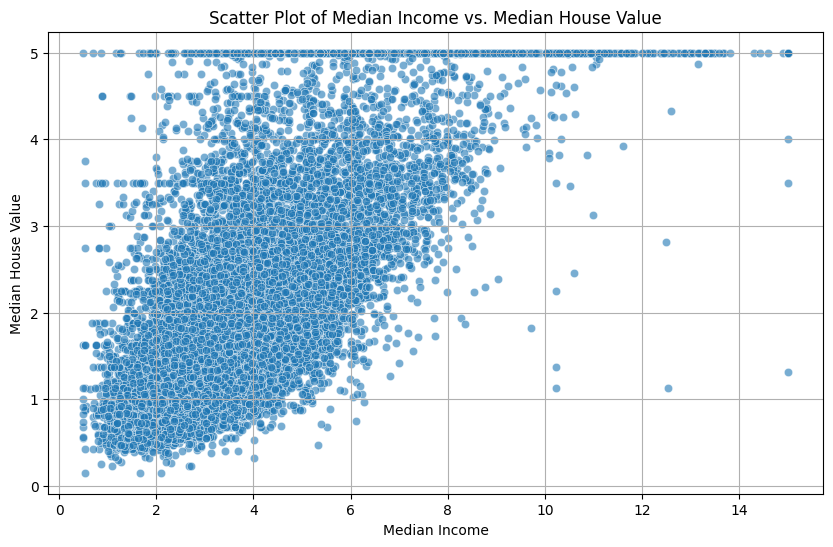

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(X, y):
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=X.flatten(), y=y, alpha=0.6)
  plt.title('Scatter Plot of Median Income vs. Median House Value')
  plt.xlabel('Median Income')
  plt.ylabel('Median House Value')
  plt.grid(True)
  plt.show()

plot_scatter(X_train, y_train)

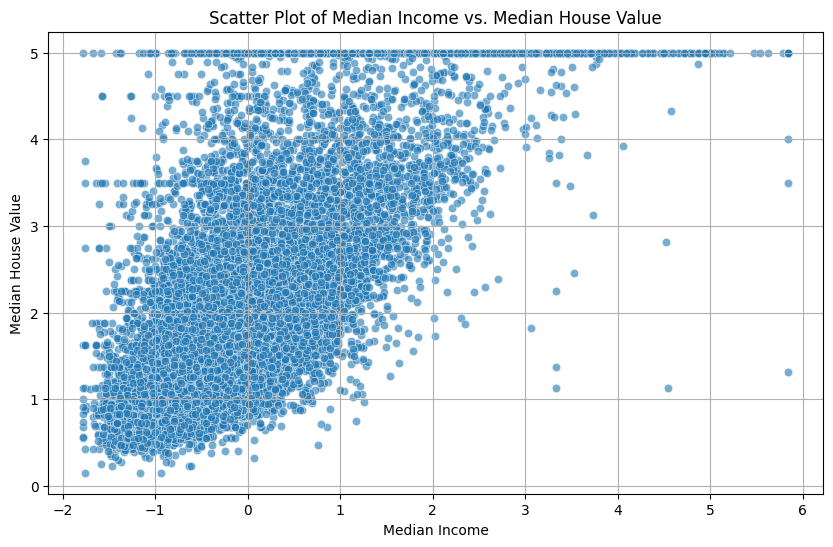

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class StandardScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
      self.mean = X.mean()
      self.std = X.std()
      return self
    def transform(self, X, y=None):
      return (X - self.mean) / self.std

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plot_scatter(X_train_scaled, y_train)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_train_scaled)

lin_reg.score(X_test_scaled, y_test)

0.45885918903846656

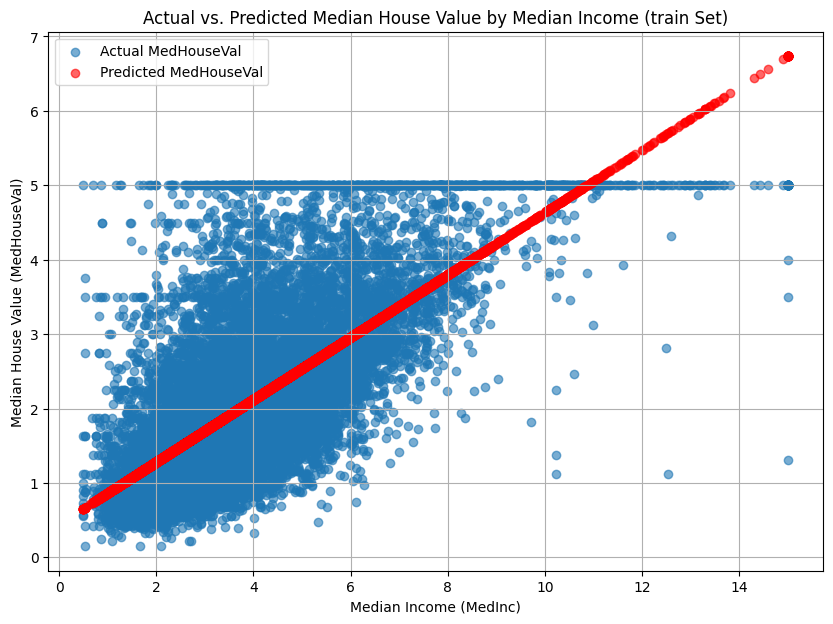

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(X, y, y_pred):
    plt.figure(figsize=(10, 7))
    plt.scatter(X, y, alpha=0.6, label='Actual MedHouseVal')
    plt.scatter(X, y_pred, alpha=0.6, label='Predicted MedHouseVal', color='red')

    plt.title('Actual vs. Predicted Median House Value by Median Income (train Set)')
    plt.xlabel('Median Income (MedInc)')
    plt.ylabel('Median House Value (MedHouseVal)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(X_train, y_train, y_pred_lr)

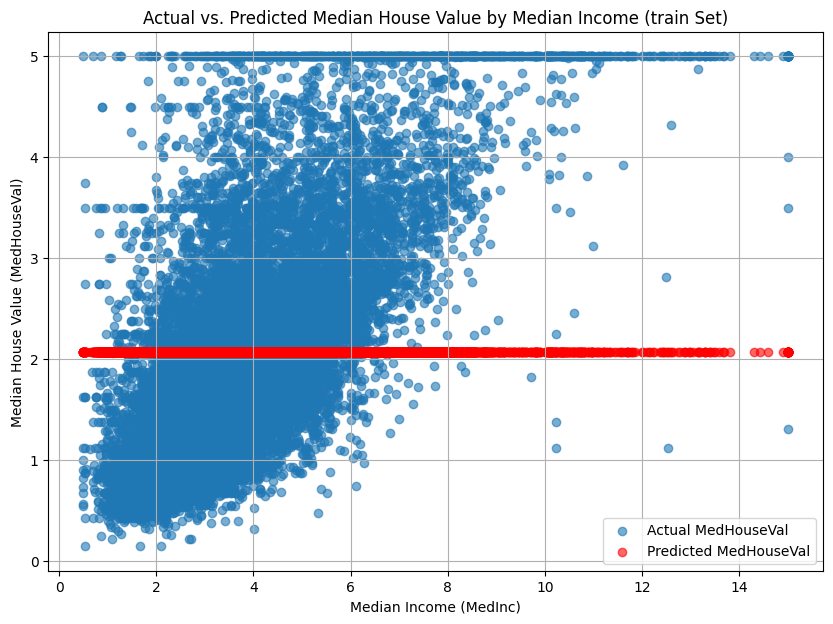

In [ ]:
def predict_average(y):
  y_pred = np.ones_like(y)
  return y_pred * y.mean()

y_pred_average = predict_average(y_train)
plot_predictions(X_train, y_train, y_pred_average)

In [ ]:
def mean_error(y, y_pred):
  y_diff = y - y_pred
  return y_diff.mean()

print('LR:', mean_error(y_train, y_pred_lr))
print('Average:', mean_error(y_train, y_pred_average))

LR: 7.729605069701308e-17
Average: 3.6146796150586495e-17


# MAE

In [ ]:
def mean_absolute_error(y, y_pred):
  y_diff = y - y_pred
  return np.abs(y_diff).mean()

print('LR:', mean_absolute_error(y_train, y_pred_lr))
print('Average:', mean_absolute_error(y_train, y_pred_average))

LR: 0.6249507655668728
Average: 0.9139114988721792


#MSE

In [ ]:
def mean_squared_error(y, y_pred):
  y_diff = y - y_pred
  return (y_diff**2).mean()

print('LR:', mean_squared_error(y_train, y_pred_lr))
print('Average:', mean_squared_error(y_train, y_pred_average))

LR: 0.6991447170182823
Average: 1.336778211789427


#RMSE

In [ ]:
def root_mean_squared_error(y, y_pred):
  y_diff = y - y_pred
  return np.sqrt((y_diff**2).mean())

print('LR:', root_mean_squared_error(y_train, y_pred_lr))
print('Average:', root_mean_squared_error(y_train, y_pred_average))


LR: 0.8361487409655547
Average: 1.1561912522543263


R2

In [ ]:
def r2_score(y, y_pred):
  ss_res = np.sum((y - y_pred)**2)
  ss_tot = np.sum((y - y.mean())**2)
  return 1 - (ss_res / ss_tot)

print('LR:', r2_score(y_train, y_pred_lr))
print('Average:', r2_score(y_train, y_pred_average))